# XRT Blop Demo

In [1]:
import numpy as np
import sys, os
from bluesky.plan_stubs import mv
# os.environ["EPICS_CA_ADDR_LIST"] = "192.168.152.15"
os.environ["EPICS_CA_ADDR_LIST"] = "127.0.0.1"
os.environ["EPICS_CA_AUTO_ADDR_LIST"] = "NO"
# import matplotlib as mpl
# mpl.use("Agg")
from matplotlib import pyplot as plt
# sys.path.append('/home/rchernikov/github/blop/src')
import blop
# sys.path.append(os.path.join('..', '..', '..')) 
from blop.utils import prepare_re_env as pre
# from blop.sim import xrt_beamline as Beamline
from xrt_beamline import Beamline, BeamlineEpics

from blop import DOF, Objective, Agent
from blop.digestion import beam_stats_digestion
import time


In [2]:
plt.ion()

kwargs_re = dict(db_type='temp', root_dir=pre.DEFAULT_ROOT_DIR)
ret = pre.re_env(**kwargs_re)

RE = ret['RE']
db = ret['db']
bec = ret['bec']

# h_opt = 4.375
# dh = 0.075

h_opt = 0
dh = 5

R1, dR1 = 40000, 10000
R2, dR2 = 20000, 10000

bec.disable_plots()

In [3]:
beamline = Beamline(name="bl")
time.sleep(1)
dofs = [
    DOF(description="KBV R",
        device=beamline.kbv_dsv,
        search_domain=(R1-dR1, R1+dR1)),
    DOF(description="KBH R",
        device=beamline.kbh_dsh,
        search_domain=(R2-dR2, R2+dR2)),

]

beamLine.toroidMirror01.R=38245
beamLine.toroidMirror02.R=21035


In [4]:
objectives = [
    Objective(name="bl_det_sum", 
              target="max",
              transform="log",
              trust_domain=(20, 1e12)),

    Objective(name="bl_det_wid_x",
              target="min",
              transform="log",
              # trust_domain=(0, 1e12),
              latent_groups=[("bl_kbh_dsh", "bl_kbv_dsv")]),
    Objective(name="bl_det_wid_y",
              target="min",
              transform="log",
              # trust_domain=(0, 1e12),
              latent_groups=[("bl_kbh_dsh", "bl_kbv_dsv")]),
]

In [5]:
agent = Agent(
    dofs=dofs,
    objectives=objectives,
    detectors=[beamline.det],
    digestion=beam_stats_digestion,
    digestion_kwargs={"image_key": "bl_det_image"},
    verbose=True,
    db=db,
    tolerate_acquisition_errors=False,
    enforce_all_objectives_valid=True,
    train_every=3,
)

In [6]:
RE(agent.learn("qr", n=16))
RE(agent.learn("qei", n=16, iterations=4))


2025-02-28 15:39:10.682 INFO: Executing plan <generator object Agent.learn at 0x1666fe5c0>
2025-02-28 15:39:10.684 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x15a5be650> from 'idle' -> 'running'
2025-02-28 15:39:10.686 INFO: running iteration 1 / 1




Transient Scan ID: 1     Time: 2025-02-28 15:39:10
Persistent Unique Scan ID: '5ad4a69a-2100-42a2-8e75-a694def8b627'
ToroidMirror1 global norm [ 0.         -0.08715574  0.9961947 ]
ToroidMirror2 center: [0, 11000, np.float64(176.32858673625165)]
ToroidMirror2 global norm [ 9.96194698e-01 -8.71557427e-02  2.17586443e-16]
Tracing takes 43.616ms
New stream: 'primary'
+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+
|   seq_num |       time | bl_kbv_dsv | bl_kbh_dsh | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |
+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+
|         1 | 15:39:10.7 |  32068.246 |  12537.672 |     61.760 |      139.650 |      156.887 |       48.400 |       45.325 |
ToroidMirror1 global norm [ 0.         -0.08715574  0.9961947 ]
ToroidMirror2 global norm [ 9.96194698e-01 -8.71557427e-02  2.1

2025-02-28 15:39:12.138 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x15a5be650> from 'running' -> 'idle'
2025-02-28 15:39:12.138 INFO: Cleaned up from plan <generator object Agent.learn at 0x1666fe5c0>
2025-02-28 15:39:12.139 INFO: Executing plan <generator object Agent.learn at 0x1666fe430>
2025-02-28 15:39:12.140 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x15a5be650> from 'idle' -> 'running'
2025-02-28 15:39:12.140 INFO: running iteration 1 / 4




Transient Scan ID: 2     Time: 2025-02-28 15:39:19
Persistent Unique Scan ID: '2b3a1532-266e-48aa-adc8-a273cb554781'
ToroidMirror1 global norm [ 0.         -0.08715574  0.9961947 ]
ToroidMirror2 global norm [ 9.96194698e-01 -8.71557427e-02  2.17586443e-16]
Tracing takes 36.553ms
New stream: 'primary'
+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+
|   seq_num |       time | bl_kbv_dsv | bl_kbh_dsh | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |
+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+
|         1 | 15:39:19.9 |  30000.000 |  30000.000 |    314.845 |      144.200 |      173.000 |      286.800 |      124.400 |
ToroidMirror1 global norm [ 0.         -0.08715574  0.9961947 ]
ToroidMirror2 global norm [ 9.96194698e-01 -8.71557427e-02  2.17586443e-16]
Tracing takes 37.298ms
|         2 | 15:39:20.0 |  3

2025-02-28 15:39:21.295 INFO: running iteration 2 / 4




Transient Scan ID: 3     Time: 2025-02-28 15:39:23
Persistent Unique Scan ID: '9f7d84fe-edde-4456-8b7a-78b1092755bd'
ToroidMirror1 global norm [ 0.         -0.08715574  0.9961947 ]
ToroidMirror2 global norm [ 9.96194698e-01 -8.71557427e-02  2.17586443e-16]
Tracing takes 37.329ms
New stream: 'primary'
+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+
|   seq_num |       time | bl_kbv_dsv | bl_kbh_dsh | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |
+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+
|         1 | 15:39:23.6 |  37390.820 |  19279.430 |  22685.674 |      204.030 |      146.443 |       68.119 |       22.416 |
ToroidMirror1 global norm [ 0.         -0.08715574  0.9961947 ]
ToroidMirror2 global norm [ 9.96194698e-01 -8.71557427e-02  2.17586443e-16]
Tracing takes 35.391ms
|         2 | 15:39:23.7 |  3

2025-02-28 15:39:25.020 INFO: running iteration 3 / 4




Transient Scan ID: 4     Time: 2025-02-28 15:39:28
Persistent Unique Scan ID: '6b0edbdc-b792-4de8-b6a7-2802c1f8c2df'
ToroidMirror1 global norm [ 0.         -0.08715574  0.9961947 ]
ToroidMirror2 global norm [ 9.96194698e-01 -8.71557427e-02  2.17586443e-16]
Tracing takes 35.027ms
New stream: 'primary'
+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+
|   seq_num |       time | bl_kbv_dsv | bl_kbh_dsh | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |
+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+
|         1 | 15:39:28.2 |  44739.512 |  19875.395 |   5957.490 |      206.957 |      151.076 |       15.101 |       62.035 |
ToroidMirror1 global norm [ 0.         -0.08715574  0.9961947 ]
ToroidMirror2 global norm [ 9.96194698e-01 -8.71557427e-02  2.17586443e-16]
Tracing takes 35.194ms
|         2 | 15:39:28.2 |  3

2025-02-28 15:39:29.499 INFO: running iteration 4 / 4




Transient Scan ID: 5     Time: 2025-02-28 15:39:32
Persistent Unique Scan ID: 'eff3b9e3-0119-40fa-af77-bca9a673c90e'
ToroidMirror1 global norm [ 0.         -0.08715574  0.9961947 ]
ToroidMirror2 global norm [ 9.96194698e-01 -8.71557427e-02  2.17586443e-16]
Tracing takes 37.366ms
New stream: 'primary'
+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+
|   seq_num |       time | bl_kbv_dsv | bl_kbh_dsh | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |
+-----------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+
|         1 | 15:39:32.9 |  39057.891 |  19303.930 |  21976.527 |      204.826 |      147.393 |       67.572 |       26.821 |
ToroidMirror1 global norm [ 0.         -0.08715574  0.9961947 ]
ToroidMirror2 global norm [ 9.96194698e-01 -8.71557427e-02  2.17586443e-16]
Tracing takes 37.792ms
|         2 | 15:39:33.0 |  3

2025-02-28 15:39:34.381 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x15a5be650> from 'running' -> 'idle'
2025-02-28 15:39:34.381 INFO: Cleaned up from plan <generator object Agent.learn at 0x1666fe430>


('2b3a1532-266e-48aa-adc8-a273cb554781',
 '9f7d84fe-edde-4456-8b7a-78b1092755bd',
 '6b0edbdc-b792-4de8-b6a7-2802c1f8c2df',
 'eff3b9e3-0119-40fa-af77-bca9a673c90e')

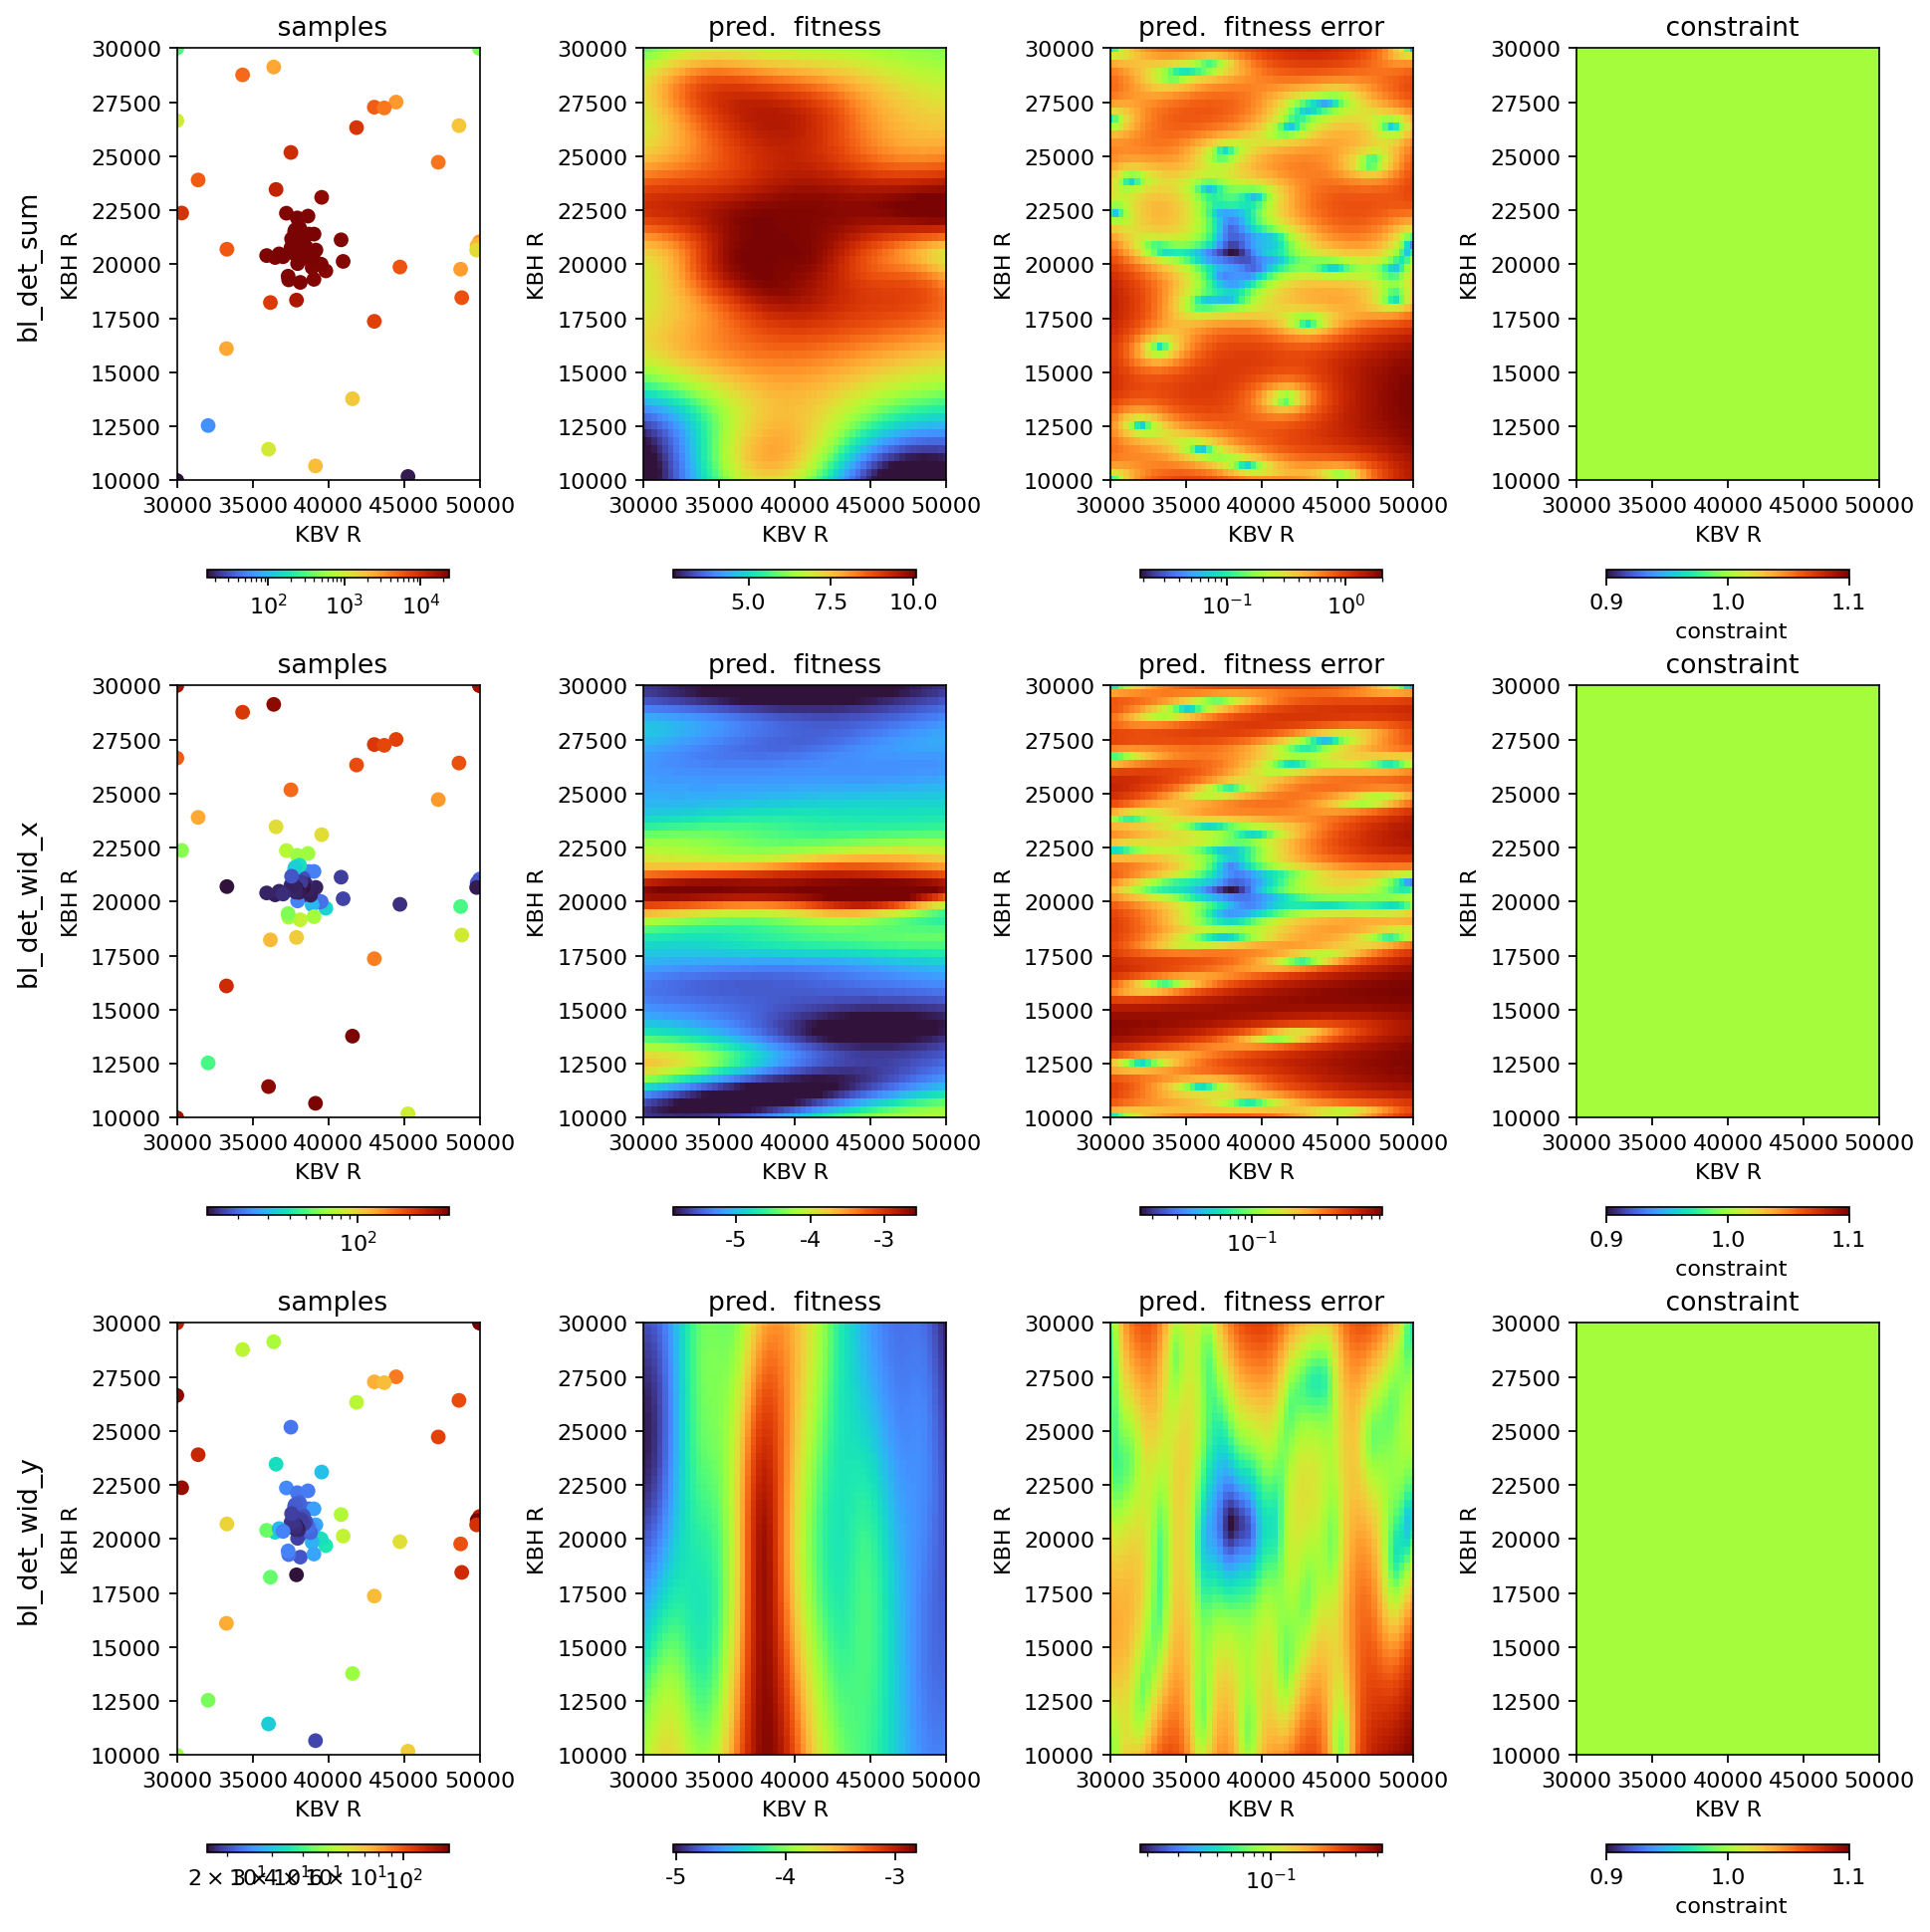

In [7]:
agent.plot_objectives(axes=(0, 1))